# House price prediction 
<img src="../static/house.png" style="width:400;height:300px" />

The aim of this project is to develop a predictive model for housing prices in Washington State using a data-driven approach. By harnessing the power of machine learning and data analysis, we will explore historical housing data, including factors such as location, square footage, number of bedrooms, and more, to create an accurate prediction model.


In this project, we utilized a dataset containing a total of 18 columns. Below, you can find detailed information about these columns:

* Date: This column contains the date when a particular property transaction occurred.

* Price: This column contains the selling price of the house in question. 

* Bedrooms: This column indicates the number of bedrooms in the house.

* Bathrooms: This column shows the number of bathrooms in the house, including both full and half bathrooms.

* Sqft_living: This column represents the total square footage of the living space (interior) of the house.

* Sqft_lot: This column is likely the total square footage of the land or plot on which the house is built.

* Floors: This column indicates the number of floors or levels in the house.

* Waterfront: It's a binary column that could indicate whether the property has a waterfront view or not (e.g., 1 for waterfront, 0 for no waterfront).

* View: This column might describe the level of view the property has, typically on a scale from 0 to 4, with 0 being no view and 4 being an excellent view.

* Condition: This column could represent the overall condition of the property, often rated on a scale from 1 to 5, with 1 being poor and 5 being excellent.

* Sqft_above: This column likely shows the square footage of the interior living space above ground level.

* Sqft_basement: This column should contain the square footage of any basement space in the house.

* Yr_built: This is the year the house was originally built.

* Yr_renovated: If the house has been renovated, this column may contain the year when the renovation took place.

* Street: This column might provide information about the street or address of the property.

* City: It represents the city where the property is located.

* Statezip: This column could contain information about the state and ZIP code of the property.

* Country: In this context, it's likely that all entries are from the same country, so this column may not provide much variation.

In [2]:
# Importing basic libraries 

import numpy as np
import pandas as pd

# Importing viusalization libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# splitting the data

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings

# Filter out a specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
# Importing dataset

df = pd.read_csv('../HousePricePredictiondataset.csv')
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


## 1) Data overview : 

It provides a broad understanding of the data's characteristics, structure, and key attributes before delving into detailed analysis. 

In [5]:
# Checking the shape of dataset

df.shape

(4600, 18)

In [6]:
# Looking at the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
# Checking for NUll values in the dataset

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
# Checking for duplicate values in the data

df.duplicated().sum()

0

In [9]:
# Number of unique values in all columns

df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

## 2) Data Cleaning : 

It is the process of identifying and correcting errors, inconsistencies, and inaccuracies in datasets to improve their quality and reliability. Data cleaning is a critical step in data preparation and is essential for accurate and meaningful data analysis. Here are the key aspects of data cleaning:

* Handling Missing Values -: Data cleaning involves identifying and dealing with missing data. This can include filling in missing values, removing rows or columns with too many missing values, or using statistical techniques to impute missing data.

* Removing Duplicates -: Duplicate records can distort analysis and lead to incorrect results. Data cleaning identifies and removes duplicate entries from the dataset.

* Correcting Inaccuracies -: This involves fixing incorrect values or outliers. For example, if a temperature reading is clearly erroneous, data cleaning may involve replacing it with a more reasonable value.

* Standardizing Data -: Data cleaning often includes standardizing data formats. This can involve converting dates to a consistent format, ensuring all text is in the same case, or converting units of measurement to a common standard.

* Handling Inconsistent Data -: Inconsistent data can arise from different sources or data entry errors. Data cleaning ensures that similar data is represented consistently, such as country names or product codes.

In [10]:
# Deleting unwanted columns in model building

del df["street"]
del df["city"]
del df["country"]
del df["date"]  

In [11]:
# Preparing the Statezip column data into more useful data

lis = []
for i in df["statezip"]:
    lis.append(i[2:])
    
arr = np.array(lis,dtype=np.int64)
df["statezip"] = arr

In the original dataset the target column, which represents house prices, contained instances with a value of zero. These zero values can be problematic for several reasons, primarily because they do not align with the real-world scenario of housing prices. 
To handle these zero values in the target column, the following approach was taken:

* Identification: First, the dataset was carefully examined to identify all rows where the target column had a value of zero.

* Data Removal: Those rows with a target value of zero were systematically removed from the dataset. This step was crucial to ensure that the data used for training the predictive model accurately reflected the market conditions.

In [12]:
df.drop(np.where(df["price"]==0)[0],axis=0,inplace=True)

## 3) Exploratory Data Analysis :

In [13]:
# Looking at the statistics of data 

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,98079.397056
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,53.048784
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000


In our dataset, we've gathered comprehensive statistics about each feature, allowing us to gain insights into the distribution and variability of our data. Let's take a closer look at the key findings:

* Price:

Variance: The price of houses shows a significant variance, with values ranging from $7,800 to $26,590,000. This wide range suggests a substantial spread in housing prices.
Skewness: The distribution of prices is positively skewed, indicating that there are relatively few extremely high-priced houses that pull the distribution to the right.

* Bedrooms:

Variance: The number of bedrooms displays limited variance, with values ranging from 0 to 9. This suggests that most houses have a typical number of bedrooms.
Skewness: The distribution of bedrooms is slightly positively skewed, indicating a slight bias towards more bedrooms.

* Bathrooms:

Variance: The number of bathrooms varies moderately, with values ranging from 0 to 8. This suggests a reasonable spread in the number of bathrooms across the dataset.
Skewness: The distribution of bathrooms is positively skewed, indicating that there are relatively few houses with an exceptionally high number of bathrooms.

* Sqft Living:

Variance: The square footage of living space in houses displays substantial variance, with values ranging from 370 to 13,540. This indicates a wide range of living space sizes.
Skewness: The distribution of square footage is positively skewed, suggesting that there are some houses with exceptionally large living spaces.

* Sqft Lot:

Variance: The size of the lots varies significantly, ranging from 638 to over a million square feet. This reveals a wide range of lot sizes in the dataset.
Skewness: The distribution of lot sizes is positively skewed, indicating that there are a few properties with exceptionally large lots.

* Floors:

Variance: The number of floors in houses exhibits limited variance, with values ranging from 1 to 3.5. This suggests that most houses in our dataset have a relatively standard number of floors.
Skewness: The distribution of floors is positively skewed, indicating a slight bias towards more floors.

* Waterfront:

Variance: Low variance implies that waterfront homes are relatively rare.
Skewness: The distribution is highly right-skewed, with waterfront properties being scarce.

* View:

Variance: There's moderate variance, indicating varying degrees of property views.
Skewness: The distribution is right-skewed, with many properties having lower view ratings.

* Condition:

Variance: Variance is moderate, suggesting a range of property conditions.
Skewness: The distribution is slightly right-skewed, indicating more properties in slightly better condition

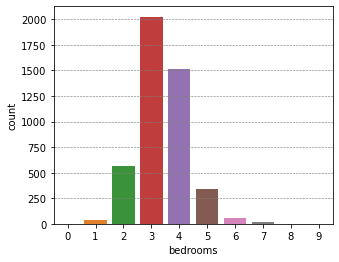

In [14]:
# Univariate analysis
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.6)
plt.style.use("ggplot")
plt.show()

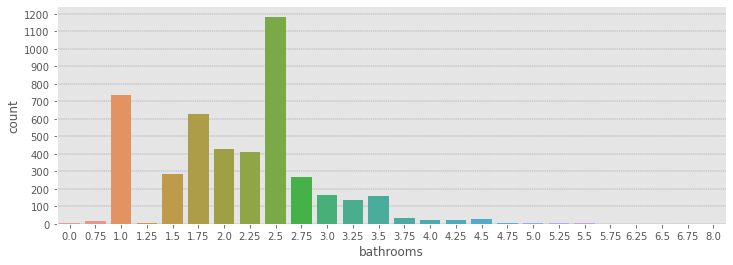

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x = "bathrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.4)
plt.yticks(range(0,1300,100))
plt.style.use("ggplot")
plt.show()

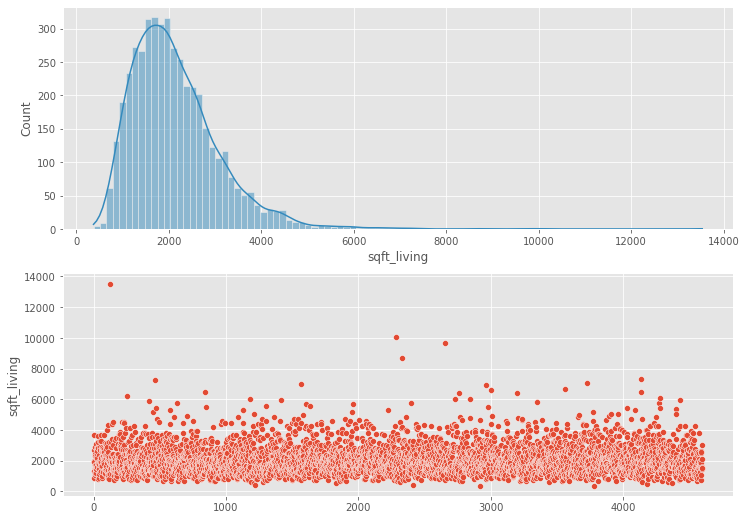

In [16]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_living",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_living")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

From above graph it is evident that in this column data is skewed. 

In [17]:
# Removing skewness from data

print("Before transformation skew : ",df["sqft_living"].skew())
df["sqft_living"] = np.log(df["sqft_living"])
print("After transformation skew : ",df["sqft_living"].skew())

Before transformation skew :  1.7188875411513491
After transformation skew :  -0.05370929015223324


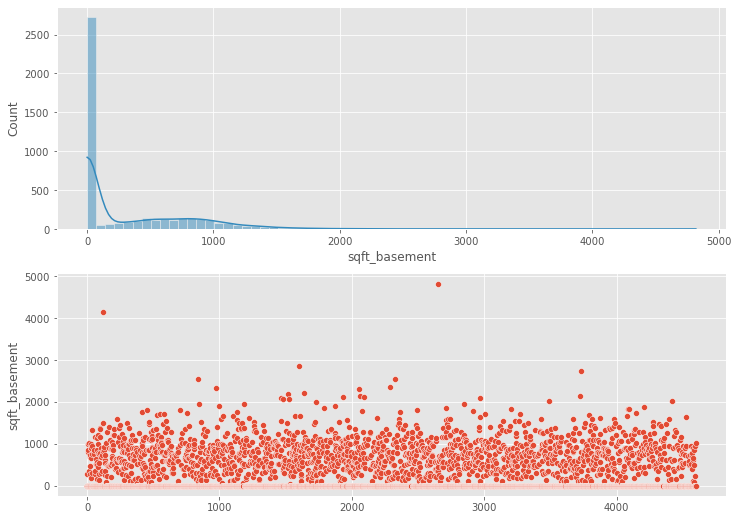

In [18]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_basement",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_basement")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

From above graph it is evident that in this column data is skewed. 

In [19]:
# Removing the skeness from data

print("Before transformation skew : ",df["sqft_basement"].skew())
df["sqft_basement"] = np.cbrt(df["sqft_basement"])
print("After transformation skew : ",df["sqft_basement"].skew())

Before transformation skew :  1.6550756371892148
After transformation skew :  0.5650940779006431


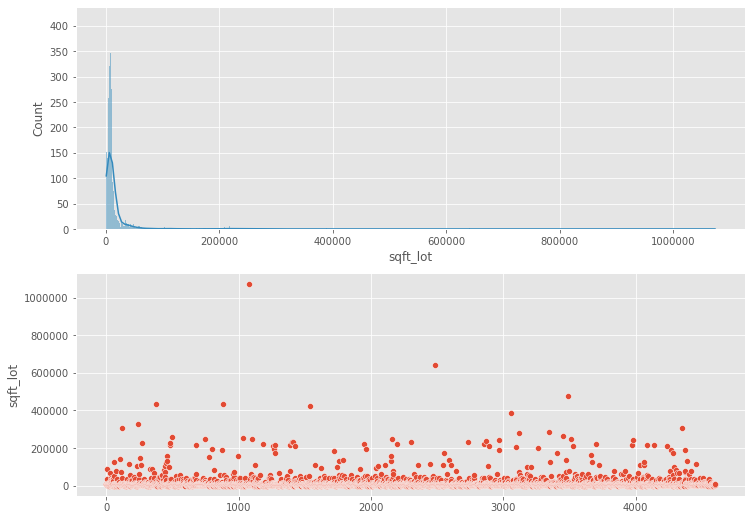

In [20]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_lot",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_lot")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

From above graph it is evident that in this column data is skewed. 

In [21]:
# Removing the skewness from data

print("Before transformation skew : ",df["sqft_lot"].skew())
df["sqft_lot"] = np.log(df["sqft_lot"])
print("After transformation skew : ",df["sqft_lot"].skew())

Before transformation skew :  11.329014386009023
After transformation skew :  0.8412624258021195


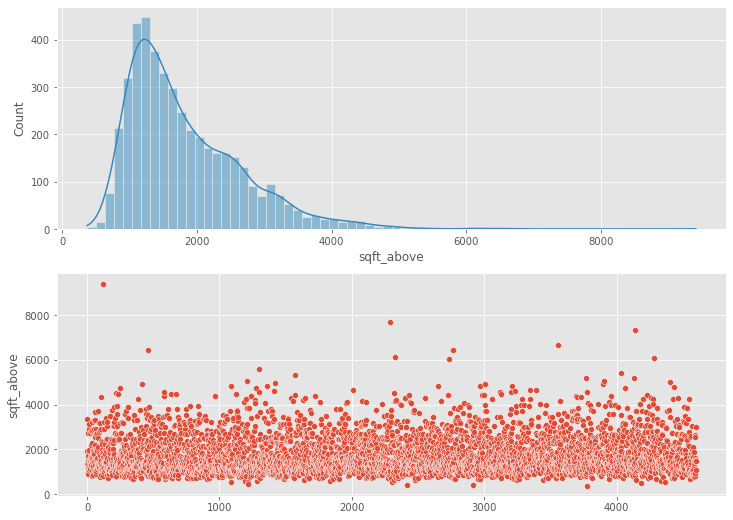

In [22]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_above",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_above")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

From above graph it is evident that in this column data is skewed. 

In [23]:
# Removing the skewness from data

print("Before transformation skew : ",df["sqft_above"].skew())
df["sqft_above"] = np.log(df["sqft_above"])
print("After transformation skew : ",df["sqft_above"].skew())

Before transformation skew :  1.4539329178421054
After transformation skew :  0.23924533231027634


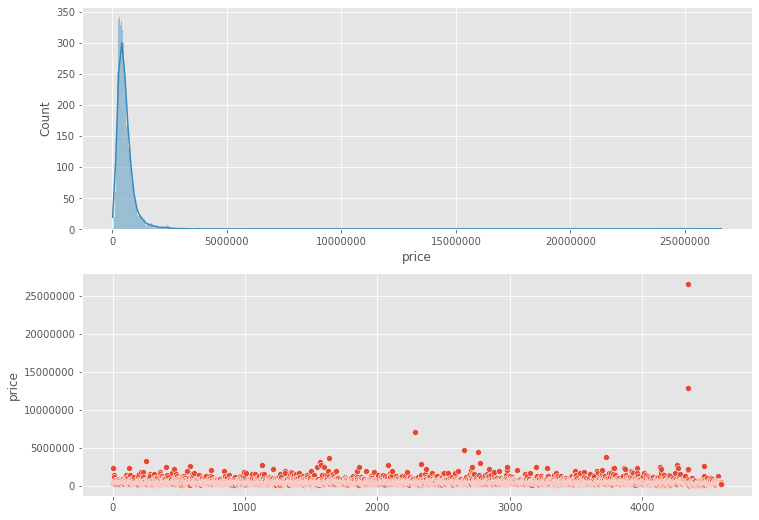

In [24]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="price",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="price")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

This is our target column, and here data is highly skewed. Thre are some impact of having skeness in target column. These are :

* Impact on Predictive Models: Right-skewed data can affect the performance of predictive models. Models like linear regression assume a symmetric distribution of residuals, and when the target variable is right-skewed, the residuals may not meet this assumption, leading to less accurate predictions.

* Bias in Analysis: In the presence of skewness, the mean may not be a representative measure of central tendency. Using the mean to describe central tendency in a right-skewed distribution can lead to biased conclusions, especially when assessing housing market trends.

In [25]:
print("Before transformation skew : ",df["price"].skew())
df["price"] = np.log(df["price"])
print("After transformation skew : ",df["price"].skew())

Before transformation skew :  25.02381726204781
After transformation skew :  0.32998138379856273


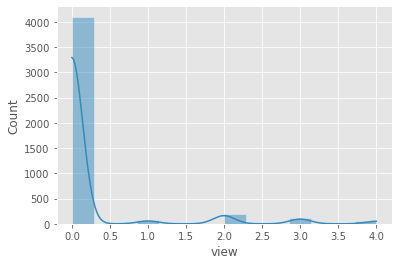

In [26]:

sns.histplot(data=df,x="view",kde=True)
plt.style.use("ggplot")


In [27]:
# Removing the skewness

print("Before transformation skew : ",df["view"].skew())
df["view"] = np.cbrt(df["view"])
print("After transformation skew : ",df["view"].skew())

Before transformation skew :  3.3733978634952058
After transformation skew :  2.7925334595507962


 Comparing various features with target column

Median value of house with respect to number of bedrooms : 
 bedrooms
0    13.990393
1    12.524526
2    12.821258
3    12.959844
4    13.262125
5    13.303017
6    13.415033
7    13.462471
8    13.615122
9    13.304683
Name: price, dtype: float64


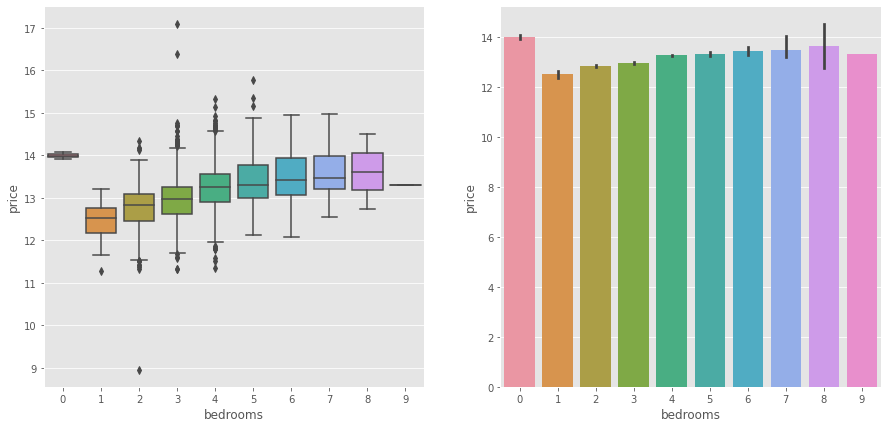

In [28]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of bedrooms : \n",df.groupby("bedrooms")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="bedrooms", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of floors : 
 floors
1.0    12.886641
1.5    13.191889
2.0    13.230321
2.5    13.630987
3.0    13.081541
3.5    13.574094
Name: price, dtype: float64


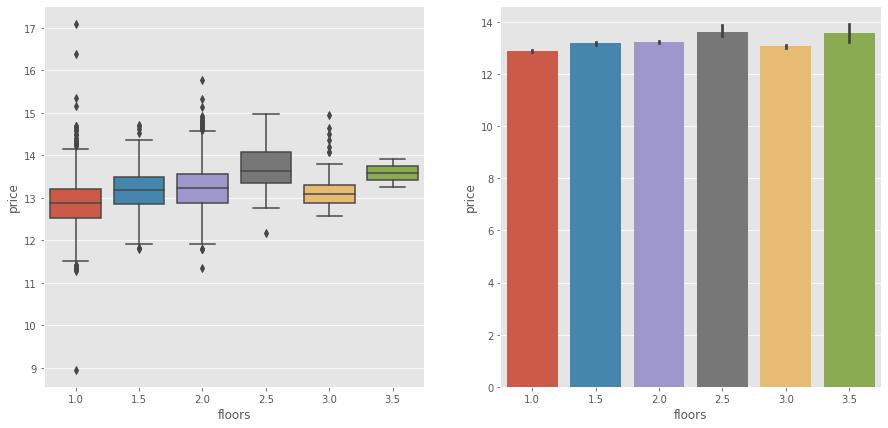

In [29]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="floors")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of floors : \n",df.groupby("floors")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="floors",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of waterfront : 
 waterfront
0    13.047640
1    13.882885
Name: price, dtype: float64


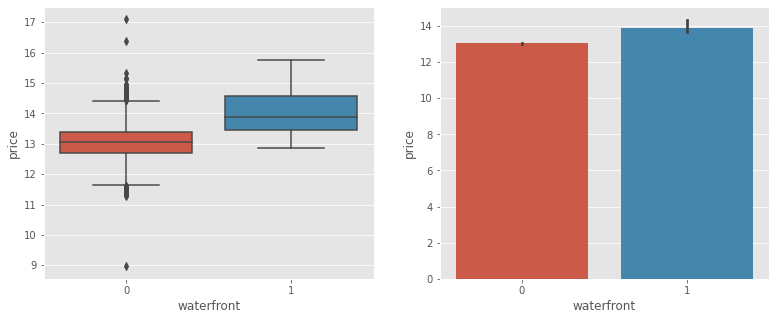

In [30]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="waterfront")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of waterfront : \n",df.groupby("waterfront")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="waterfront",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of view : 
 view
0.000000    13.005830
1.000000    13.485617
1.259921    13.407467
1.442250    13.710150
1.587401    13.954403
Name: price, dtype: float64


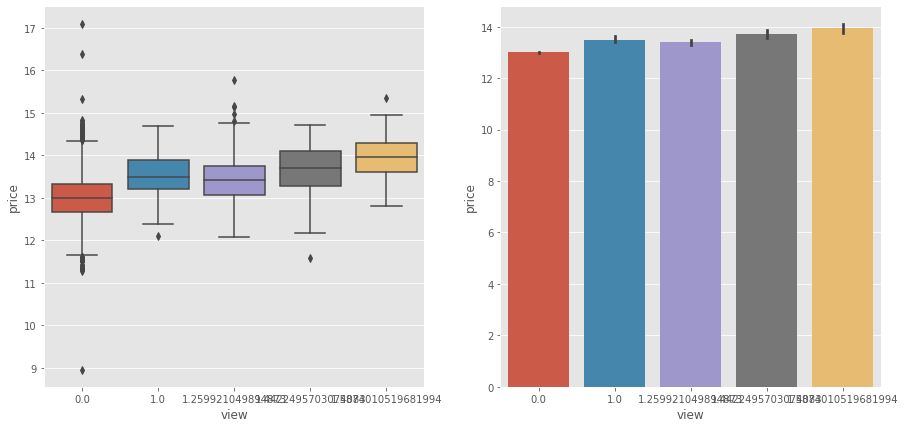

In [31]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="view")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of view : \n",df.groupby("view")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="view", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of condition : 
 condition
1    12.628336
2    12.429216
3    13.051834
4    12.994530
5    13.232114
Name: price, dtype: float64


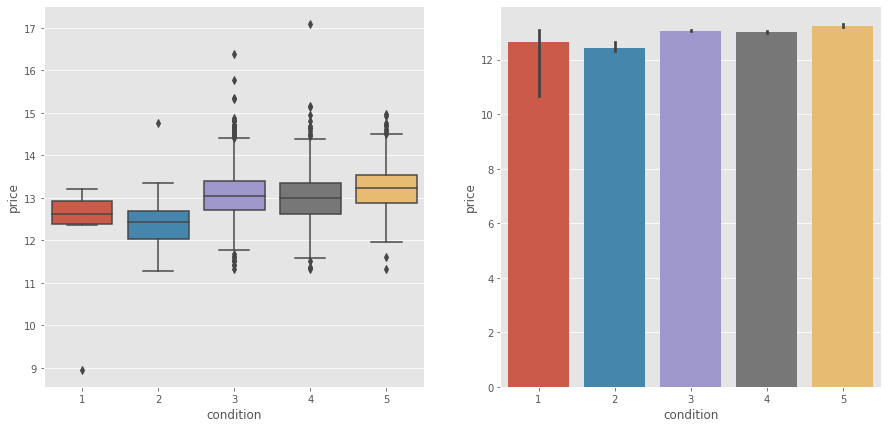

In [32]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="condition")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of condition : \n",df.groupby("condition")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="condition", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

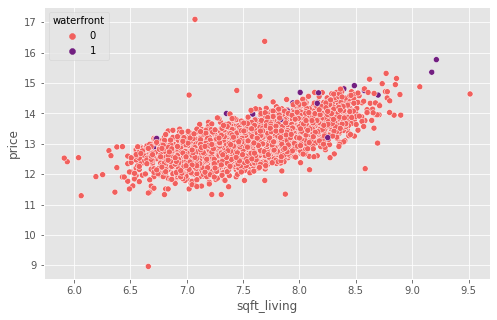

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,y="price",x="sqft_living",hue="waterfront",palette= 'magma_r')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

Based on the graph displayed above, it's clear that houses situated with a waterfront view tend to command higher prices.

## 4) Data preprocessing :

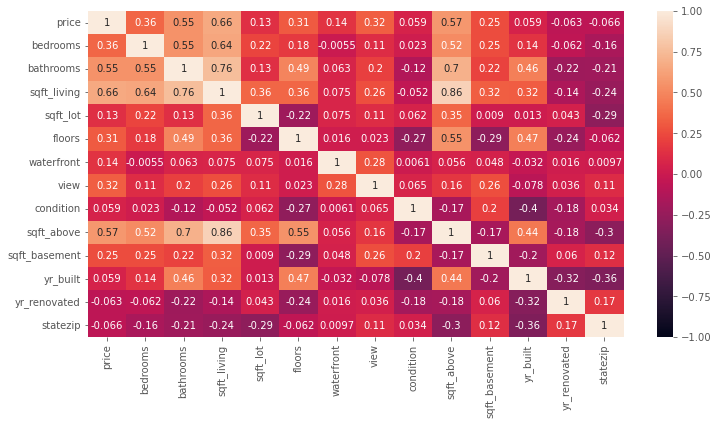

In [34]:
# Checking the correlation of features

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

Delting the column with highest correlation : from above it is evident that sqft_above is highly correlated with sqft_living. 

In [35]:
del df["sqft_above"]

## 5) Model Building : 

In [36]:
# Splitting the data in target and Features

X = df.drop("price",axis=1,inplace=False)
Y = df.loc[:,"price"]

print("Shape of x : ",X.shape)
print("Shape of y : ",Y.shape)

Shape of x :  (4551, 12)
Shape of y :  (4551,)


In [37]:
# scalling the data

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [38]:
# Splitting the data in training and testing

Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Y,test_size=0.2,random_state=42)

In [39]:
# Building the model

gradient = GradientBoostingRegressor(random_state=42)
gradient.fit(Xtrain,Ytrain)

GradientBoostingRegressor(random_state=42)

In [40]:
Ypred = gradient.predict(Xtest)

In [41]:
# Calculating the metrics

print("mse : ",mean_squared_error(Ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(Ytest,Ypred)))
print("mae : ",mean_absolute_error(Ytest,Ypred))
print("train r2score : ",r2_score(Ytrain,gradient.predict(Xtrain)))
print("test r2score : ",r2_score(Ytest,Ypred))

mse :  0.09481253901538607
rmse :  0.30791644810790164
mae :  0.21513970326733928
train r2score :  0.7817068398857432
test r2score :  0.6763250485979948


In [42]:
# Setting hyperparameters

parameter = {
                "learning_rate":[0.05,0.08,0.1,0.04],
                "n_estimators":[100,200,300,400],
                "min_samples_split":[4,6,8,9,11],
                "min_samples_leaf":[3,5,7,9],
                "max_depth":[5,7,9,11]
}

In [43]:
# Hyperparameter tuning

gradient = GradientBoostingRegressor()
random = RandomizedSearchCV(gradient,parameter,cv=5,random_state=42)
random.fit(Xtrain,Ytrain)
best_parameters = random.best_params_
best_score = random.best_score_
print(best_parameters)
print(best_score)

{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.08}
0.7552193631303834


In [44]:
Ypred = random.predict(Xtest)
print("mse : ",mean_squared_error(Ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(Ytest,Ypred)))
print("mae : ",mean_absolute_error(Ytest,Ypred))
print("test r2score : ",r2_score(Ytest,Ypred))

mse :  0.07476583852476447
rmse :  0.27343342612922156
mae :  0.177271775138008
test r2score :  0.7447613005374091


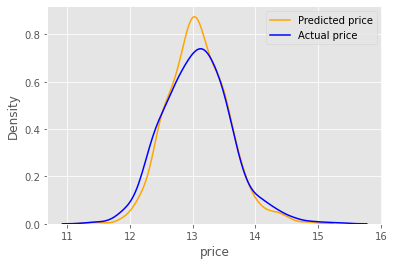

In [45]:
sns.kdeplot(x=Ypred,color="orange",label="Prdicted price")
sns.kdeplot(x=Ytest,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

In [46]:
# Building the model
forest = RandomForestRegressor(random_state=42)
forest.fit(Xtrain, Ytrain)

RandomForestRegressor(random_state=42)

In [47]:
# Predictions
Ypred_forest = forest.predict(Xtest)

In [48]:
# Calculating the metrics
mse_forest = mean_squared_error(Ytest, Ypred_forest)
rmse_forest = np.sqrt(mse_forest)
mae_forest = mean_absolute_error(Ytest, Ypred_forest)
train_r2score_forest = r2_score(Ytrain, forest.predict(Xtrain))
test_r2score_forest = r2_score(Ytest, Ypred_forest)

In [49]:
# Printing the metrics
print("mse : ", mse_forest)
print("rmse : ", rmse_forest)
print("mae : ", mae_forest)
print("train r2score : ", train_r2score_forest)
print("test r2score : ", test_r2score_forest)

mse :  0.09592558602923058
rmse :  0.3097185593877619
mae :  0.21339911667167924
train r2score :  0.9575545094298218
test r2score :  0.672525282851232


In [50]:
# Setting hyperparameters
parameter = {
    "n_estimators": [100, 200, 300, 400],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [5, 7, 9, 11],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "bootstrap": [True, False]
}

In [51]:
# Hyperparameter tuning
random_forest = RandomForestRegressor(random_state=42)
random = RandomizedSearchCV(random_forest, parameter, cv=5, random_state=42)
random.fit(Xtrain, Ytrain)
best_parameters = random.best_params_
best_score = random.best_score_

print("Best parameters:", best_parameters)
print("Best score:", best_score)


Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 11, 'bootstrap': True}
Best score: 0.6417197962267532


In [52]:
# Predictions
Ypred_forest = random.predict(Xtest)

# Calculating the metrics
mse_forest = mean_squared_error(Ytest, Ypred_forest)
rmse_forest = np.sqrt(mse_forest)
mae_forest = mean_absolute_error(Ytest, Ypred_forest)
test_r2score_forest = r2_score(Ytest, Ypred_forest)


In [53]:
# Printing the metrics
print("mse : ", mse_forest)
print("rmse : ", rmse_forest)
print("mae : ", mae_forest)
print("test r2score : ", test_r2score_forest)


mse :  0.1058464082436764
rmse :  0.3253404497502215
mae :  0.23900955541373095
test r2score :  0.6386571712968354


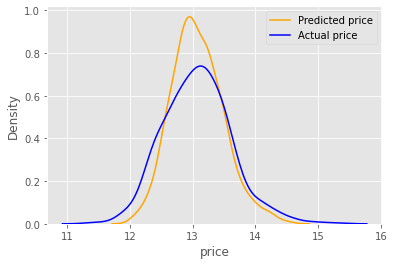

In [54]:
sns.kdeplot(x=Ypred_forest, color="orange", label="Predicted price")
sns.kdeplot(x=Ytest, color="blue", label="Actual price")
plt.legend(["Predicted price", "Actual price"])
plt.show()